#### Death toll data from Wikipedia

This is an attempt to summarise war death toll data from Wikipedia: https://en.wikipedia.org/wiki/List_of_wars_by_death_toll

I downloaded the data in April 2024 (copied the tables from the Wiki page and saved as csv)

The general approach is to extract and clean the dates and death ranges.

In [4]:
import pandas as pd
w = pd.read_csv(r"C:\Users\karol\projects\wikiWar\war_data_04_2024.csv")
w.head()

,War,Death\nrange,Date,Combatants,Location,Notes
0,Bar Kokhba Revolt,"580,000",132–136,Roman Empire vs. Jews,Middle East,– Also known as the Third Jewish–Roman War\n– ...
1,Chinese Warring States,"1,500,000+",c. 475 BC – 221 BC,Seven great powers of China,China,"Estimated at 1,500,000 before Qin's wars of un..."
2,Cimbrian War,"410,000–650,000",113 BC–101 BC,Roman Republic vs. Cimbri and Teutones,Western Europe,Part of the Germanic Wars
3,Conquests of Cyrus the Great,"100,000+",549 BC–530 BC,Persian Empire vs. various states,Middle East,Number given is the sum of all deaths in battl...
4,First Jewish–Roman War,"250,000–1,100,000[5]",66–73,Roman Empire vs. Jews,Middle East,– Part of Jewish–Roman Wars


In [5]:
w[w['War'] == 'World War I']


,War,Death\nrange,Date,Combatants,Location,Notes
111,World War I,"17,000,000-40,000,000",1914–1918,Allied Powers vs. Central Powers,Worldwide,[27] – Also known as the Great War


In [6]:
'''
This function takes the middle year of a range as the year to display on graph


#find start date
#if BC
import math
import re

def cleanDate(rawDate):
    try:
        if "–" not in rawDate:
            return int(rawDate)
        else:
            #extract
            year1, year2 = re.findall(r'\d+', rawDate)
            year1 = int(year1)
            year2 = int(year2)
            if "BC" in rawDate:
                return (year1+year2)//2
            else:
                return math.ceil((year1+year2)/2)
    except ValueError:
        return rawDate
'''
#use start date as reference point, not the middle date

import re

def extractFirstNumber(stringWithNumbers):
    try:
        # Find the first group of digits, including commas
        match = re.search(r'[\d,]+', stringWithNumbers)
        
        if match:
            # Replace commas and convert to an integer
            return int(match.group().replace(',', ''))
        else:
            return stringWithNumbers
    except ValueError:
        return stringWithNumbers


    
#calculate average toll if there is a range ?


#graph by location

In [7]:
w['cleanDate'] = w['Date'].map(extractFirstNumber)


In [8]:
#check whether all dates got extracted

# This approach directly filters rows where the conversion to numeric results in NaN, 
# indicating that those rows contain string values in the 'cleanDate' column.

rows_with_strings = w[pd.to_numeric(w['cleanDate'], errors='coerce').isna()]
rows_with_strings

,War,Death\nrange,Date,Combatants,Location,Notes,cleanDate


In [9]:
#create a BC column
w['BC'] = w['Date'].str.contains('BC')

In [10]:
w = w.rename(columns = {'Death\nrange':'casualties'})


Extract higher death toll range and lower death toll range and put them in separate columns

In [11]:
w['lowerRange'] = w['casualties'].map(extractFirstNumber)

In [12]:
#extract higher range or any number if there is just one number
import re

def extractSecondOrFirstNumber(stringWithNumbers):
    
    try:
        # Remove commas, then find all groups of digits
        stringWithNumbers =stringWithNumbers.replace(',', '')
        matches = re.findall(r'\d+',stringWithNumbers)
        if matches:
            if len(matches) == 1:
                return int(matches[0])
            elif len(matches) == 2 and '[' in stringWithNumbers and ']' in stringWithNumbers:
                # Check if the second value is in brackets
                return int(matches[0])
            else:
                return int(matches[1])
        else:
            return stringWithNumbers
    except ValueError:
        return stringWithNumbers
    

In [13]:
w['higherRange'] = w['casualties'].map(extractSecondOrFirstNumber)

In [14]:
df = w[['War','cleanDate', 'BC', 'lowerRange', 'higherRange']]

In [15]:
df.describe()

,cleanDate,lowerRange,higherRange
count,201.000000,2.010000e+02,2.010000e+02
mean,1637.781095,1.960347e+06,3.031922e+06
std,556.089509,7.183868e+06,9.668514e+06
min,58.000000,1.500000e+04,2.500000e+04
25%,1616.000000,1.000000e+05,1.100000e+05
50%,1894.000000,2.500000e+05,3.620000e+05
75%,1971.000000,7.700000e+05,1.200000e+06
max,2023.000000,8.000000e+07,8.000000e+07


In [16]:
#find row with max value
max_lower_range_row = df.loc[df['lowerRange'].idxmax()]

print(max_lower_range_row)

War            World War II
cleanDate              1939
BC                    False
lowerRange         80000000
higherRange        80000000
Name: 123, dtype: object


In [17]:
df[df['higherRange'] > 30000000]

,War,cleanDate,BC,lowerRange,higherRange
18,Three Kingdoms War,184,False,36000000,40000000
25,An Lushan Rebellion,755,False,13000000,36000000
30,Mongol invasions and conquests,1206,False,30000000,40000000
84,Taiping Rebellion,1850,False,20000000,70000000
111,World War I,1914,False,17000000,40000000
123,World War II,1939,False,80000000,80000000


In [18]:
df[df.War == 'Reconquista']

,War,cleanDate,BC,lowerRange,higherRange
23,Reconquista,711,False,7000000,7000000


The original graph in Wikipedia takes the geometric mean from the range, so I will do the same here.

In [21]:
#check for null values
# Check for null values in the first column
df['lowerRange'].isnull().any()
df['higherRange'].isnull().any()
 

False

In [25]:
import numpy as np
#df['geom_mean'] = np.sqrt(df['lowerRange'] * df['higherRange'])
df.loc[:, 'geom_mean'] = np.sqrt(df['lowerRange'] * df['higherRange'])


In [58]:
df[(df['geom_mean']>4000000)&(df['geom_mean']<6000000)]

,War,cleanDate,BC,lowerRange,higherRange,geom_mean
21,Yellow Turban Rebellion,184,False,3000000,7000000,4.582576e+06
58,Mughal–Maratha Wars,1658,False,5000000,5000000,5.000000e+06
73,Napoleonic Wars,1803,False,3500000,7000000,4.949747e+06
87,Miao Rebellion,1854,False,4900000,4900000,4.900000e+06


In [70]:
df[(df['geom_mean']>1500000)&(df['geom_mean']<3000000)]

,War,cleanDate,BC,lowerRange,higherRange,geom_mean
10,Jewish–Roman Wars,66,False,1270000,2000000,1.593738e+06
12,Punic Wars,264,True,1620000,1920000,1.763633e+06
22,Arab–Byzantine Wars,629,False,2000000,2000000,2.000000e+06
28,Crusades,1095,False,1000000,3000000,1.732051e+06
32,Hundred Years' War,1337,False,2300000,3500000,2.837252e+06
45,French Wars of Religion,1562,False,2000000,4000000,2.828427e+06
68,Tây Sơn rebellion,1771,False,1200000,2000000,1.549193e+06
108,Mexican Revolution,1910,False,1000000,3500000,1.870829e+06
136,Korean War,1950,False,1500000,4500000,2.598076e+06
139,Vietnam War,1955,False,1300000,4300000,2.364318e+06


### Deat toll graph - first attempt

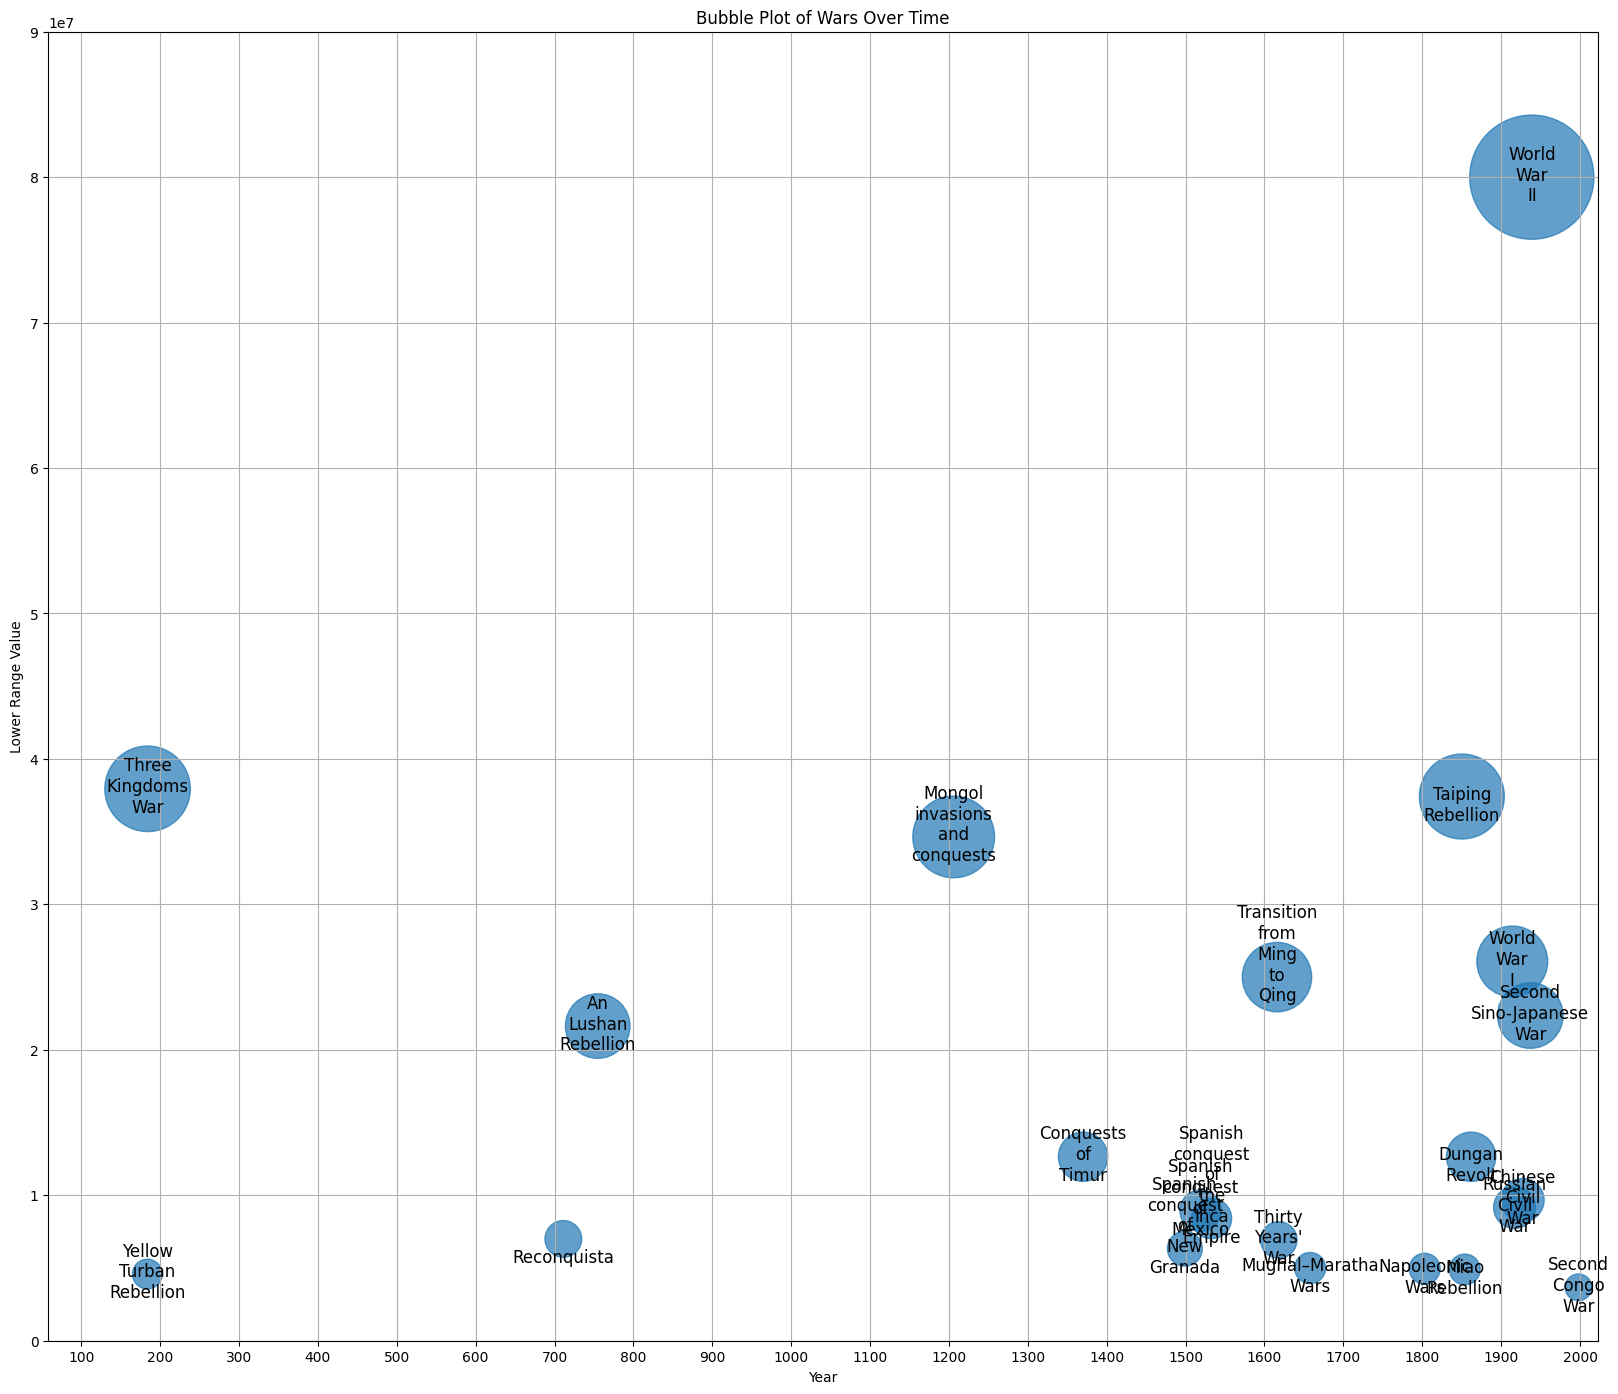

In [28]:
'''
The issue with this bubble graph is the overlapping bubbles and text. I tried using jitter but that didn't help too much.
The text is split into lines to fit better.

'''

import matplotlib.pyplot as plt
import numpy as np

# Assuming your DataFrame is named 'df'
plt.figure(figsize=(20, 17))

# Filter data for BC and AD separately
ad_data = df[(df['BC'] == False) & (df['geom_mean'] > 3000000)]




jitter = 0.1  # Adjust the jitter value based on your preference
# plt.scatter(x_values + np.random.normal(0, jitter, size=len(x_values)),
#             y_values + np.random.normal(0, jitter, size=len(y_values)),
#             s=bubble_size, alpha=0.7)

# Plot AD data
scatter = plt.scatter(ad_data['cleanDate']+ np.random.normal(0, jitter, size=len(ad_data['cleanDate'])), ad_data['geom_mean']+np.random.normal(0, jitter, size=len(ad_data['geom_mean'])), s=ad_data['geom_mean'] / 10000, alpha=0.7)


# Set custom limits for better visibility
plt.xlim(min(df['cleanDate']), max(df['cleanDate']))
plt.ylim(0, max(df['geom_mean']) + 10000000)  # Adjusted upper limit up to 9M

# Add ticks every 50 years starting from 0 to 2100
plt.xticks(range(100, 2100, 100))

# Add 'war' field as multiline text on each bubble
# for x, y, war in zip(ad_data['cleanDate'], ad_data['higherRange'], ad_data['War']):
#     plt.annotate(war, (x, y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=12, color='black')
    
    
for x, y, war in zip(ad_data['cleanDate'], ad_data['geom_mean'], ad_data['War']):
    if len(war)>1:
        lines = war.split()
        text = '\n'.join(lines)
    else:
        text = war
    plt.annotate(text, (x, y), textcoords="offset points", xytext=(0, -17), ha='center', fontsize=12, color='black')

    
    

# Customize the plot
plt.title('Bubble Plot of Wars Over Time')
plt.xlabel('Year')
plt.ylabel('Lower Range Value')
#plt.legend()
plt.grid(True)

# Improve layout
# plt.tight_layout()

plt.show()

Looks like a good candidate for broken axes package

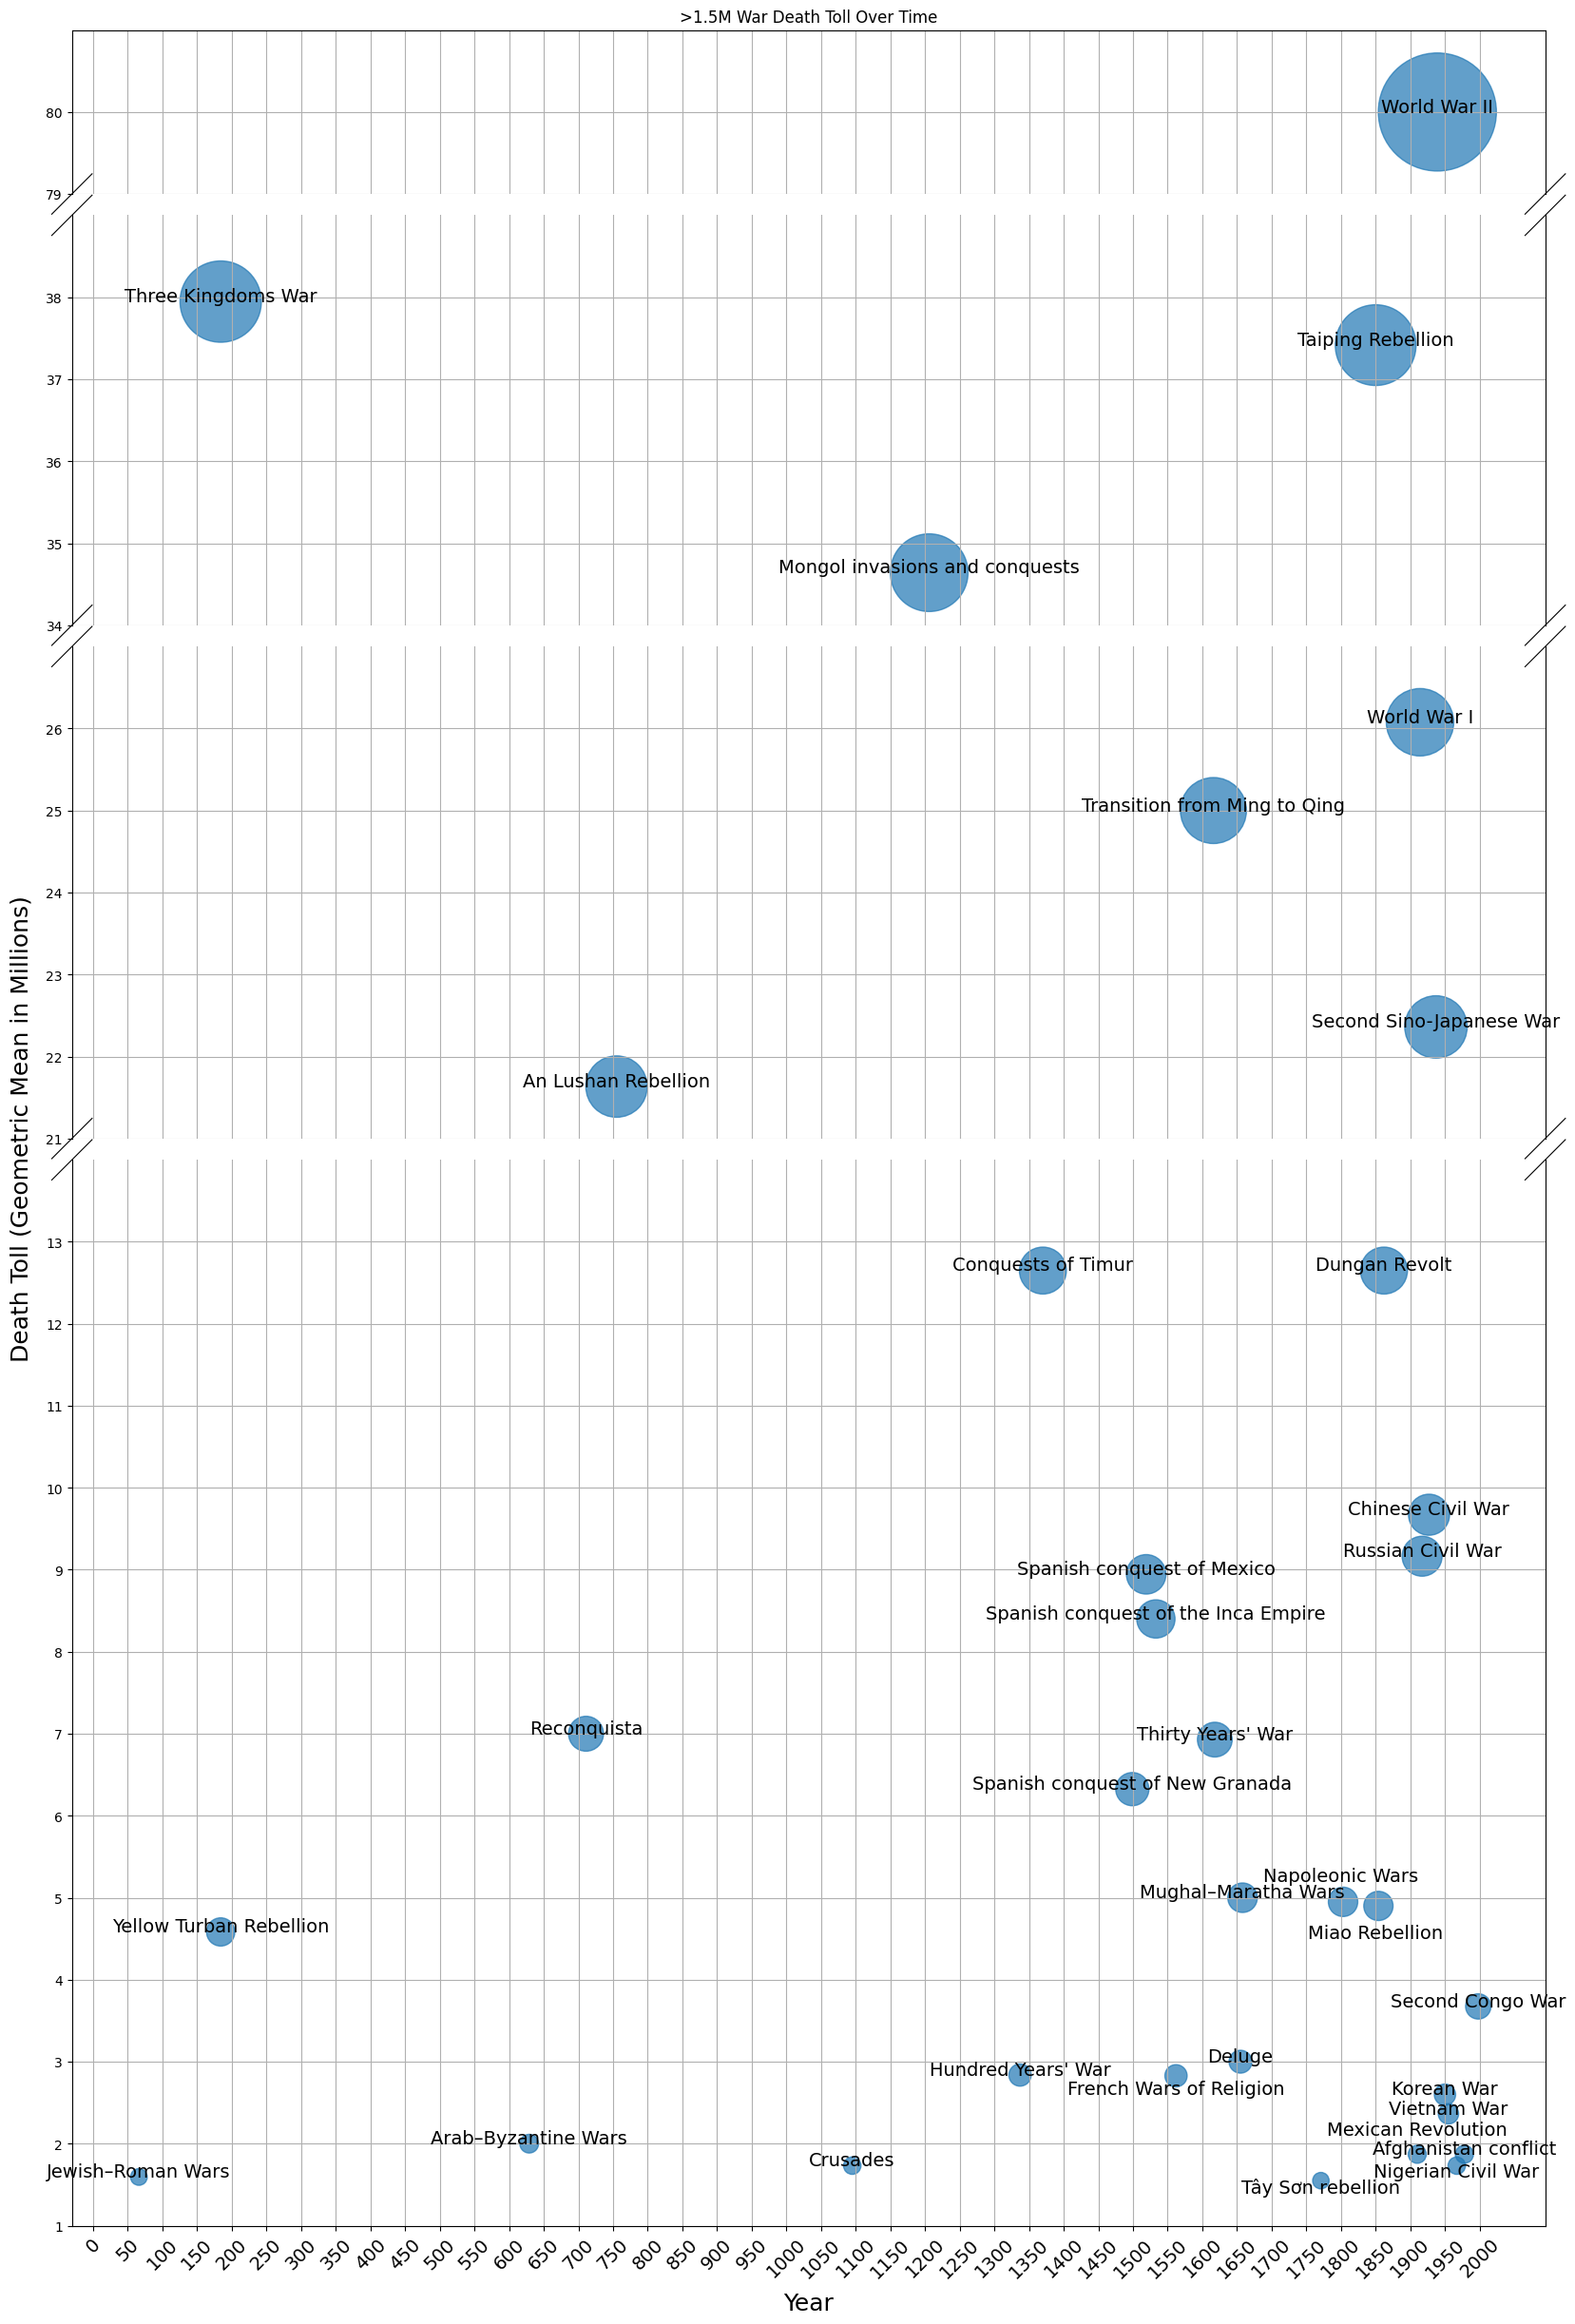

In [78]:
from brokenaxes import brokenaxes

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20, 30))

# Filter data for BC and AD separately
ad_data = df[(df['BC'] == False) & (df['geom_mean'] > 1500000)]



# Create a brokenaxes instance within the figure
bax = brokenaxes(
    ylims=((1, 14),(21,27), (34,39),(79, 81)),
    hspace=.04,
    despine=False
)

y_millions = [y / 1e6 for y in ad_data['geom_mean']]

# Scatter plot with bubble sizes based on modified 'higherRange'
bax.scatter(ad_data['cleanDate'], y_millions, s=[size / 10000 for size in ad_data['geom_mean']], alpha=0.7)



#  # Format Ticks
#https://stackoverflow.com/questions/77415705/how-do-i-get-plotly-to-display-a-graph-object-scatter-plot-type-line-with-ra


    
    # Manually adjust the position of specific labels
label_adjustments = {
   
 'Napoleonic Wars': (1800, 5.2), 
 'Miao Rebellion':(1850, 4.5),
'French Wars of Religion':(1562,2.6),
'Mexican Revolution': (1910,2.1),
'Tây Sơn rebellion': (1771, 1.4),
'Nigerian Civil War': (1967,1.6)	}  # Adjust coordinates as needed

# Remove the manually added war from the list of wars to be annotated
wars_to_annotate = ad_data[~ad_data['War'].isin(label_adjustments.keys())]

# Convert y-values to millions for tick labels
y_millions_ad = [y / 1e6 for y in wars_to_annotate['geom_mean']]
# Annotate each point with the respective 'War' label using offset_transform
# for x, y, war in zip(wars_to_annotate['cleanDate'], wars_to_annotate['sum_higher_rank'], wars_to_annotate['War']):
#     ax.annotate(war, (x, y), textcoords=offset_transform, ha='center', fontsize=8, color='black')
    
    #Annotate each point with the respective 'War' label
for x, y, war in zip(wars_to_annotate['cleanDate'], y_millions_ad, wars_to_annotate['War']):
    bax.annotate(war, (x, y), ha='center', fontsize=14, color='black')

# Manually adjust the position of specific labels
for label, (x_pos, y_pos) in label_adjustments.items():
    bax.annotate(label, (x_pos, y_pos), ha='center', fontsize=14, color='black') #color='red'
    


#y ticks need to be set manually    
bax.axs[3].yaxis.set_ticks(np.arange(1, 14, 1))
bax.axs[2].yaxis.set_ticks(np.arange(21, 27, 1))
bax.axs[1].yaxis.set_ticks(np.arange(34, 39, 1))
bax.axs[0].yaxis.set_ticks(np.arange(79, 81, 1)) 

# Customize the plot
# Add labels and title
bax.set_title('>1.5M War Death Toll Over Time')
bax.set_xlabel('Year',  labelpad = 50, fontsize=18)
bax.set_ylabel('Death Toll (Geometric Mean in Millions)',  labelpad = 30, fontsize=18)
for ax in bax.axs:
    ax.grid(which='major', axis='both')
    ax.xaxis.set_tick_params(labelsize=14, rotation=45)
    ax.xaxis.set_ticks(np.arange(0, 2001, 50))
#fig.tight_layout()#not sure this is working....


plt.show()
